In [63]:
import numpy as np
from PatchGenerator import PatchGenerator 
import keras
from os import listdir
from os.path import join
from random import sample
from sklearn import metrics
from sklearn.model_selection import KFold
import pandas as pd

In [2]:
def makeNetwerk():
    Input = keras.layers.Input(shape=(21,21,1))
    hidden = keras.layers.Conv2D(32,3)(Input)
    hidden = keras.layers.Conv2D(32,3,activation="relu")(hidden)
    hidden = keras.layers.Conv2D(32,3,activation="relu")(hidden)
    hidden = keras.layers.Flatten()(hidden)
    output = keras.layers.Dense(2,activation="softmax")(hidden)
    
    model = keras.models.Model(Input,output)
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
    

In [3]:
from matplotlib import pyplot as plt
class PlotLosses(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs['loss'])
        self.val_losses.append(logs['val_loss'])
        self.i += 1

        #plt.clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.grid()
        plt.legend()
        plt.show();

In [4]:
dataRoot = "./regions"
files = listdir(join(dataRoot,"images"))
valFiles = sample(files,int(len(files)*0.3))
trainFiles = [f for f in files if not f in valFiles]
testFiles = sample(trainFiles,int(len(files)*0.3))
trainFiles = [f for f in trainFiles if not f in testFiles]

Epoch 1/25
50/50 [==============================] - 3s 56ms/step - loss: 0.5891 - acc: 0.7200 - val_loss: 0.4464 - val_acc: 0.8000


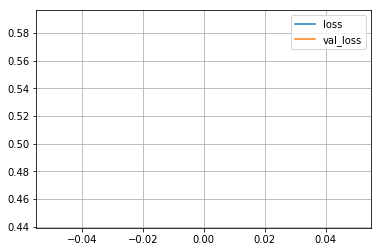

Epoch 2/25
50/50 [==============================] - 3s 53ms/step - loss: 0.4180 - acc: 0.8050 - val_loss: 0.6052 - val_acc: 0.7250


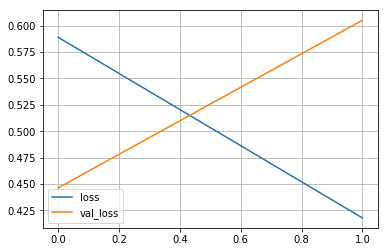

Epoch 3/25
50/50 [==============================] - 2s 47ms/step - loss: 0.3857 - acc: 0.8344 - val_loss: 0.4747 - val_acc: 0.7875


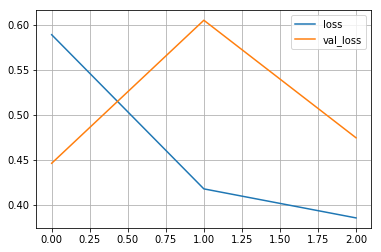

Epoch 4/25
50/50 [==============================] - 2s 47ms/step - loss: 0.3485 - acc: 0.8556 - val_loss: 0.3294 - val_acc: 0.8812


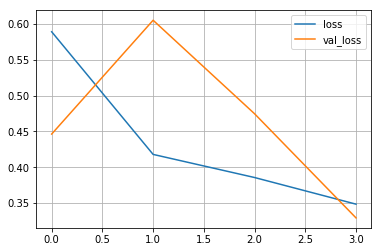

Epoch 5/25
50/50 [==============================] - 3s 58ms/step - loss: 0.2936 - acc: 0.8844 - val_loss: 0.3466 - val_acc: 0.8562


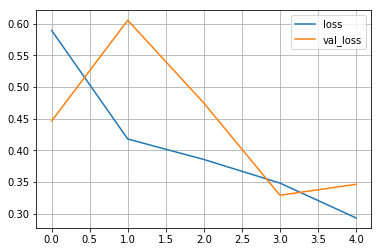

Epoch 6/25
50/50 [==============================] - 2s 46ms/step - loss: 0.2846 - acc: 0.8906 - val_loss: 0.4718 - val_acc: 0.8187


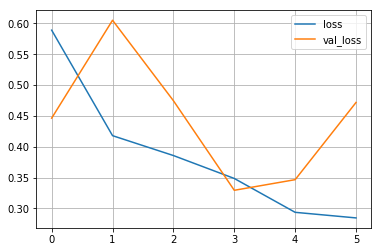

Epoch 7/25
50/50 [==============================] - 3s 54ms/step - loss: 0.2748 - acc: 0.8937 - val_loss: 0.2713 - val_acc: 0.9187


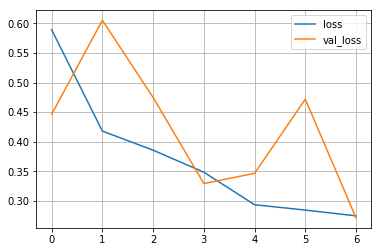

Epoch 8/25
50/50 [==============================] - 2s 47ms/step - loss: 0.2662 - acc: 0.9000 - val_loss: 0.7383 - val_acc: 0.7688


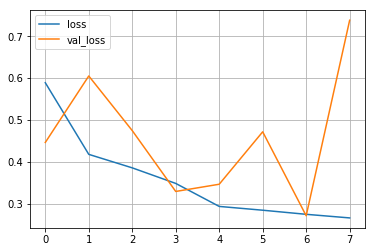

Epoch 9/25
50/50 [==============================] - 3s 53ms/step - loss: 0.2625 - acc: 0.9025 - val_loss: 0.4102 - val_acc: 0.8375


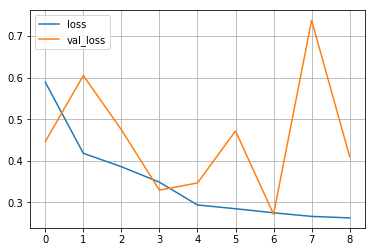

Epoch 10/25
50/50 [==============================] - 2s 46ms/step - loss: 0.2431 - acc: 0.9194 - val_loss: 0.2533 - val_acc: 0.8875


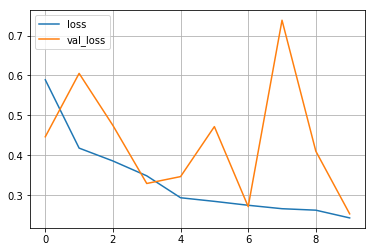

Epoch 11/25
50/50 [==============================] - 3s 54ms/step - loss: 0.2666 - acc: 0.8962 - val_loss: 0.4890 - val_acc: 0.8250


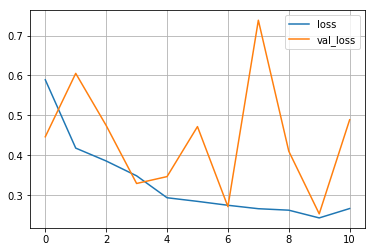

Epoch 12/25
50/50 [==============================] - 3s 56ms/step - loss: 0.2294 - acc: 0.9113 - val_loss: 0.3880 - val_acc: 0.8562


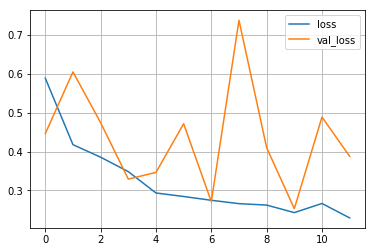

Epoch 13/25
50/50 [==============================] - 2s 47ms/step - loss: 0.2558 - acc: 0.9119 - val_loss: 0.5030 - val_acc: 0.8562


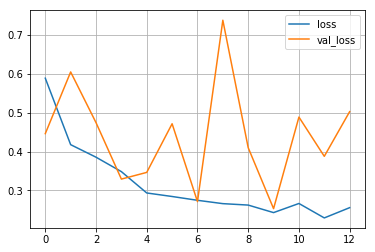

Epoch 14/25
50/50 [==============================] - 3s 51ms/step - loss: 0.2112 - acc: 0.9275 - val_loss: 0.7632 - val_acc: 0.7375


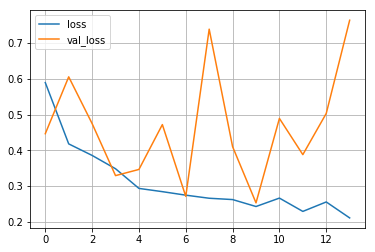

Epoch 15/25
50/50 [==============================] - 2s 48ms/step - loss: 0.2517 - acc: 0.9113 - val_loss: 0.8780 - val_acc: 0.7375


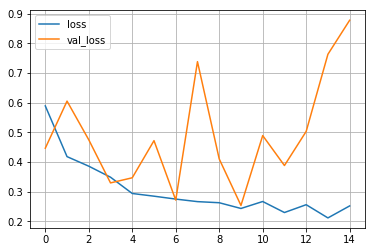

Epoch 16/25
50/50 [==============================] - 3s 56ms/step - loss: 0.2456 - acc: 0.9106 - val_loss: 0.4480 - val_acc: 0.8313


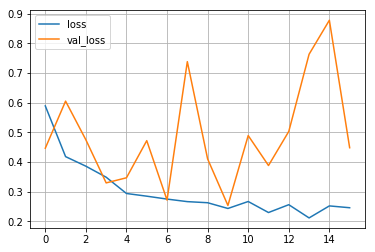

Epoch 17/25
50/50 [==============================] - 3s 59ms/step - loss: 0.2480 - acc: 0.9131 - val_loss: 0.3288 - val_acc: 0.8375


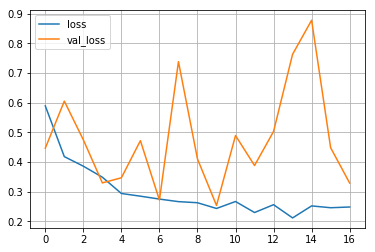

Epoch 18/25
50/50 [==============================] - 2s 45ms/step - loss: 0.2331 - acc: 0.9194 - val_loss: 0.4886 - val_acc: 0.8562


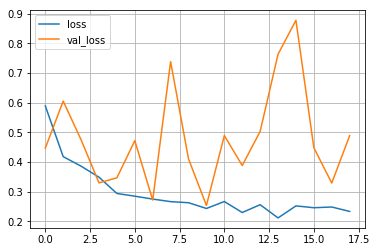

Epoch 19/25
50/50 [==============================] - 3s 57ms/step - loss: 0.2241 - acc: 0.9137 - val_loss: 0.6314 - val_acc: 0.7937


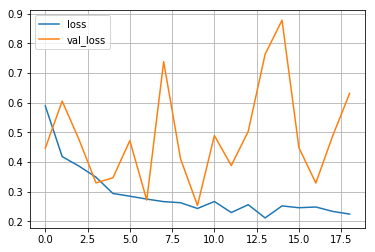

Epoch 20/25
50/50 [==============================] - 2s 43ms/step - loss: 0.2169 - acc: 0.9244 - val_loss: 0.3349 - val_acc: 0.8812


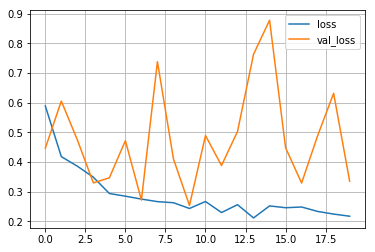

Epoch 21/25
50/50 [==============================] - 2s 49ms/step - loss: 0.2128 - acc: 0.9225 - val_loss: 0.4320 - val_acc: 0.8500


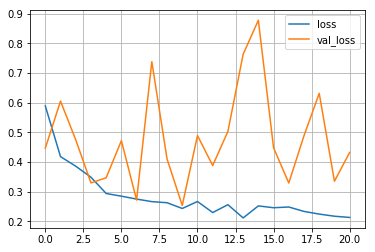

Epoch 22/25
50/50 [==============================] - 3s 51ms/step - loss: 0.2108 - acc: 0.9281 - val_loss: 0.5600 - val_acc: 0.8000


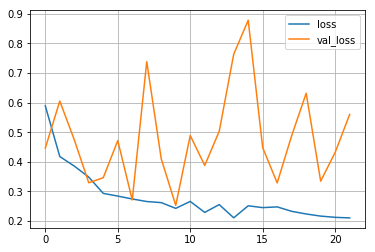

Epoch 23/25
50/50 [==============================] - 2s 45ms/step - loss: 0.2335 - acc: 0.9100 - val_loss: 0.6045 - val_acc: 0.7875


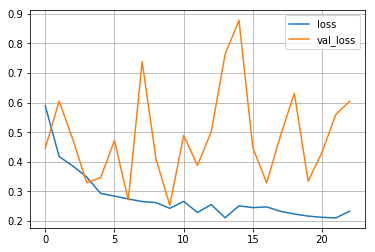

Epoch 24/25
50/50 [==============================] - 3s 52ms/step - loss: 0.2216 - acc: 0.9169 - val_loss: 0.7144 - val_acc: 0.7750


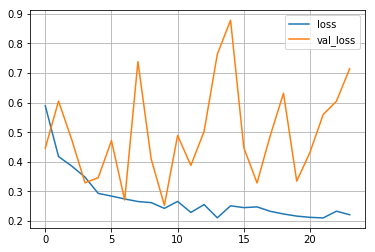

Epoch 25/25
50/50 [==============================] - 3s 55ms/step - loss: 0.1943 - acc: 0.9181 - val_loss: 0.3777 - val_acc: 0.8375


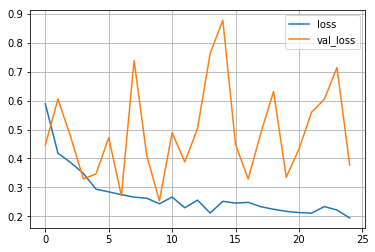

In [76]:
network_path = "./models/bestModel.h5"
model = makeNetwerk()
train_gen = PatchGenerator(dataRoot,32,10,(21,21),fileSet=trainFiles)
val_gen = PatchGenerator(dataRoot,32,10,(21,21),fileSet=valFiles)

callbacks_list = [
    #keras.callbacks.ModelCheckpoint(network_path, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1),
    #keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto'),
    #keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', cooldown=0, min_lr=0),
    PlotLosses()
]

history = model.fit_generator(train_gen,steps_per_epoch=50, epochs=25,callbacks=callbacks_list,validation_data=val_gen,validation_steps=5)

In [77]:
def predictWithModel(model,generator):#,batches=10):
    true = []
    pred = []
    #for _ in range(batches):
    X,Y = generator.next()
    true.append(np.argmax(Y,axis=1))
    p = model.predict(X)
    pred.append(p)
    true = np.concatenate(true,axis=0)
    pred = np.concatenate(pred,axis=0)
    return true,pred

In [78]:
def makeRUC(model,generator):#,batches=10):
    true,pred = predictWithModel(model,generator)#,batches=batches)
    
    # Compute the roc curve and the area under the curve
    fpr, tpr, thresholds_roc = metrics.roc_curve(true, pred[:,1])
    auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [84]:
def makeConfusionMatrix(model,generator,threshold):#,batches=10):
    true,pred = predictWithModel(model,generator)#,batches=batches)
    thres = pred[:,1] > threshold
    convMat = metrics.confusion_matrix(true, thres)
    tn, fp, fn, tp = metrics.confusion_matrix(true, thres).ravel()
    convMat = convMat / convMat.astype(np.float).sum(axis=1)
    print("TN:", tn, " FP:", fp, " FN", fn, " TP:", tp, "\n" )
    print(pd.crosstab(true, thres, rownames=['True'], colnames=['Predicted'], margins=True));
    print("\n")
    print(convMat)

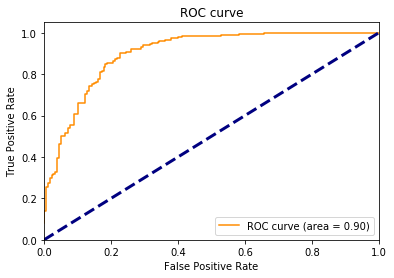

TN: 141  FP: 39  FN 16  TP: 164 

Predicted  False  True  All
True                       
0            141    39  180
1             16   164  180
All          157   203  360


[[ 0.78333333  0.21666667]
 [ 0.08888889  0.91111111]]


In [85]:
test_gen = PatchGenerator(dataRoot,360,10,(21,21),fileSet=testFiles)
#makeRUC(model,test_gen,batches=10)
makeRUC(model,test_gen)
makeConfusionMatrix(model,test_gen,0.5)#,batches=10)